# Perceptron

## Algoritma
---

_**Step 0**_ Inisialisasi bobot dan bias <br>
$\hspace{1.1cm}$ Set *learning rate* $\alpha\;(0<\alpha\le1)$ <br>
_**Step 1**_ Ketika kondisi berhenti bernilai *false*, kerjakan _Step 2-6_ <br>
$\hspace{1.1cm}$_**Step 2**_ Untuk setiap pasangan pembelajaran $s:t$, kerjakan _Step 3-5_ <br>
$\hspace{2.3cm}$_**Step 3**_ Set aktivasi unit input <br>
$\hspace{3.5cm}$ $x_i=s_i$ <br>
$\hspace{2.3cm}$_**Step 4**_ Hitung respon untuk unit output <br>
$\hspace{3.5cm}$ $y_{in}=b+\sum\limits_{i}x_iw_i$ <br>
$\hspace{3.5cm}$ $y=\left\{
\begin{align*}
1,&\hspace{1cm}\text{jika } y_{in}>\theta\\
0,&\hspace{1cm}\text{jika }-\theta\le y_{in}\le\theta\\
-1,&\hspace{1cm}\text{jika }y_{in}<-\theta,
\end{align*}
\right.$ <br>
$\hspace{2.3cm}$_**Step 5**_ Perbarui bobot dan bias jika terjadi error <br>
$\hspace{3.5cm}$ Jika $y\ne t$, <br>
$\hspace{4cm}$ $w_i(baru)=w_i(lama)+\alpha tx_i$, <br>
$\hspace{4cm}$ $b(baru)=b(lama)+\alpha t$ <br>
$\hspace{3.5cm}$ jika tidak, <br>
$\hspace{4cm}$ $w_i(baru)=w_i(lama)$, <br>
$\hspace{4cm}$ $b(baru)=b(lama)$ <br>
$\hspace{1.1cm}$_**Step 6**_ Tes kondisi berhenti

---

## Impementasi Algoritma

##### 1. Mengimport library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### 2. Algoritma Perceptron

In [2]:
def Perceptron(x_unit,t,max_epoch,learning_rate=1,threshold=0):
    # Step 0
    w = np.zeros(x_unit.shape[1])
    b = 0
    epoch = 1
    
    # Step 1
    while epoch < max_epoch:
        stop = True
        # Step 2
        for i in range(x_unit.shape[0]):
            # Step 3 adalah x_unit
            # Step 4
            y_in = b + sum(x_unit[i,:]*w)
            if y_in > threshold:
                y = 1
            elif y_in < -threshold:
                y = -1
            else:
                y = 0
                
            temp_w = np.copy(w)
            temp_b = np.copy(b)
            
            # Step 5
            if y != t[i]:
                w += learning_rate*t[i]*x_unit[i,:]
                b += learning_rate*t[i]
                
            dw = w - temp_w
            db = b - temp_b
            
            if (not np.array_equal(dw,np.zeros(dw.shape))) or (db!=0):
                stop = False
        # Step 6
        if stop:
            break
            
        epoch += 1
    return w,b

##### 3. Testing algoritma Perceptron

In [3]:
def PredictPerceptron(x_input,weight,bias,threshold=0):
    y_in = bias + sum(x_input*weight)
    
    if y_in > threshold:
        y = 1
    elif y_in < -threshold:
        y = -1
    else:
        y = 0
    return y

##### 4. Ploting garis batas keputusan

In [4]:
def PlotPerceptron(x_unit,target,weight,bias,title=""):
    # Plot titik
    color = {-1:"r",1:"b"}
    sns.scatterplot(x_unit[:,0],x_unit[:,1],hue=target,s=200,legend="full",palette=color)
    
    # Plot sumbu-x dan sumbu-y
    plt.hlines(0,-2,2)
    plt.vlines(0,-2,2)
    
    # Plot persamaan garis
    x = np.array([-2,2])
    m = -weight[0]/weight[1]
    n = -bias/weight[1]
    y = m*x + n
    plt.plot(x,y,"g-")
    
    plt.title("Perceptron "+title)
    plt.legend(title="Target")
    plt.xlim([-2,2])
    plt.ylim([-2,2])
    plt.xticks([])
    plt.yticks([])

In [5]:
x_unit = np.array([[1,1],
                      [1,-1],
                      [-1,1],
                      [-1,-1]])
target_nand = np.array([-1,1,1,1])
weight,bias = Perceptron(x_unit,target_nand,100)

## Contoh Soal

### Contoh 1: Metode Perceptron untuk input bipolar dan target bipolar menggunakan fungsi logika AND

Untuk input bipolar dan target bipolar menggunakan fungsi logika AND menghasilkan tabel berikut ini 

$$\begin{align*}
\text{Input}&&\text{Target}\\
1\hspace{0.5cm}1&&1\hspace{0.38cm}\\
1\hspace{0.35cm}\text{-}1&&\text{-}1\hspace{0.38cm}\\
\text{-}1\hspace{0.5cm}1&&\text{-}1\hspace{0.38cm}\\
\text{-}1\hspace{0.35cm}\text{-}1&&\text{-}1\hspace{0.38cm}\\
\end{align*}
$$

Diberikan _learning rate_ ($\alpha=1$), _threshold_ ($\theta=0$), dan maksimum _epoch_ adalah 100.

##### Implementasi algoritma Perceptron

In [6]:
# Input
x1 = np.array([[1,1],
                [1,-1],
                [-1,1],
                [-1,-1]])
# Target
t1 = np.array([1,-1,-1,-1])

# Perhitungan bobot dan bias dengan metode perceptron
w1,b1 = Perceptron(x1,t1,100)

# Prediksi target
pred1 = [PredictPerceptron(x,w1,b1) for x in x1]

##### Analisis hasil prediksi

In [7]:
for i in range(len(pred1)):
    print("Input",x1[i,:],"\tmemiliki target:",t1[i],"\thasil prediksi:",pred1[i])

Input [1 1] 	memiliki target: 1 	hasil prediksi: 1
Input [ 1 -1] 	memiliki target: -1 	hasil prediksi: -1
Input [-1  1] 	memiliki target: -1 	hasil prediksi: -1
Input [-1 -1] 	memiliki target: -1 	hasil prediksi: -1


##### Visualisasi garis batas keputusan untuk input

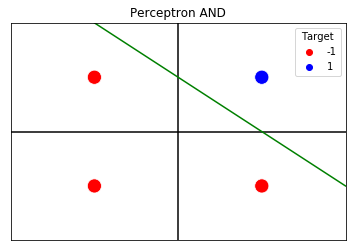

In [8]:
PlotPerceptron(x1,t1,w1,b1,title="AND")

### Contoh 2: Metode Perceptron untuk input biner dan target bipolar menggunakan fungsi logika OR

Untuk input biner dan target bipolar menggunakan fungsi logika OR menghasilkan tabel berikut ini 

$$\begin{align*}
\text{Input}&&\text{Target}\\
1\hspace{0.5cm}1&&1\hspace{0.38cm}\\
1\hspace{0.5cm}0&&1\hspace{0.38cm}\\
0\hspace{0.5cm}1&&1\hspace{0.38cm}\\
0\hspace{0.5cm}0&&\text{-}1\hspace{0.38cm}\\
\end{align*}
$$

Diberikan _learning rate_ ($\alpha=0.7$), _threshold_ ($\theta=0.2$), dan maksimum _epoch_ adalah 200.

##### Implementasi algoritma Perceptron

In [9]:
# Input
x2 = np.array([[1,1],
                [1,0],
                [0,1],
                [0,0]])
# Target
t2 = np.array([1,1,1,-1])

# Perhitungan bobot dan bias dengan metode perceptron
w2,b2 = Perceptron(x2,t2,200,learning_rate=0.7,threshold=0.2)

# Prediksi target
pred2 = [PredictPerceptron(x,w2,b2,threshold=0.2) for x in x2]

##### Analisis hasil prediksi

In [10]:
for i in range(len(pred2)):
    print("Input",x2[i,:],"\tmemiliki target:",t2[i],"\thasil prediksi:",pred2[i])

Input [1 1] 	memiliki target: 1 	hasil prediksi: 1
Input [1 0] 	memiliki target: 1 	hasil prediksi: 1
Input [0 1] 	memiliki target: 1 	hasil prediksi: 1
Input [0 0] 	memiliki target: -1 	hasil prediksi: -1


##### Visualisasi garis batas keputusan untuk input

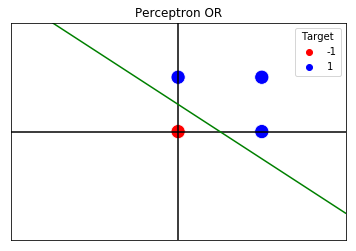

In [11]:
PlotPerceptron(x2,t2,w2,b2,title="OR")

### Catatan:
Metode Perceptron tidak bisa digunakan untuk logika XOR dan XNOR

## Daftar Pustaka

[1] $\hspace{0.5cm}$ L. Fausett, _Fundamentals of Neural Networks_. Prentice Hall, 1994